In [114]:
"""this is a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information """

# import libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.metrics import classification_report,recall_score ,precision_score ,confusion_matrix 



# read training data

with open('/Users/mac/Desktop/code_soft/Genre Classification Dataset/train_data.txt','r') as file:
    content=file.read()    
line_content=content.split('\n')
len(line_content)
import numpy as np
data=[line.strip().split(':::') for line in line_content ]
for line in data :
    while len(line) < 4:
        line.append(None)
    if len(line) > 4:
        line=line[:4]
        
        
        
        
        
# make it as data frame and preprocessing data and make it clear

data_frame=pd.DataFrame(data=data,columns=['a','b','c','d'])
print(f"the sample of training data in data frame \n {data_frame.head()}")
print('='*20)
print('information of training data frame ')
print(data_frame.info())
print('='*20)
print('the description of data ')
print(data_frame.describe())
print('='*20)
print('the sum of none values in data ')
print(data_frame.isnull().sum())
print('='*20)
data_frame=data_frame.dropna()
print('the sum of none values in data after drop it ')
print(data_frame.isnull().sum())
print('='*20)

data_frame.columns=['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
print('the final data frame after preprocessing')
print(data_frame.head())
print('='*20)



x_train=data_frame.drop(['ID','GENRE','TITLE'],axis=1)
y_train=data_frame['GENRE']



# prepare the classification models in pipeline

pipelineLR=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LogisticRegression())])
piplineSVM=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LinearSVC())])
piplineNB=Pipeline([('tfidf',TfidfVectorizer()),('classifier',MultinomialNB())])

the sample of training data in data frame 
     a                                   b           c  \
0  1        Oscar et la dame rose (2009)       drama    
1  2                        Cupid (1997)    thriller    
2  3    Young, Wild and Wonderful (1980)       adult    
3  4               The Secret Sin (1915)       drama    
4  5              The Unrecovered (2007)       drama    

                                                   d  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
information of training data frame 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54215 entries, 0 to 54214
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       54215 non-null  object
 1   b       54214 non-null  ob

In [115]:
# prepare x_test

with open('/Users/mac/Desktop/code_soft/Genre Classification Dataset/test_data.txt','r') as test_file:
    test_content=test_file.read()
test_lines=test_content.strip().split('\n')
test_lines=[line.strip().split(':::') for line in test_lines]
for line in test_lines:
    while len(line)< 3 :
        line.append(None)
    if len(line) >3:
        line=line[:4]
test_data=pd.DataFrame(data=test_lines,columns=['ID', 'TITLE', 'DESCRIPTION'])
x_test=test_data['DESCRIPTION']


# prepare y_test

with open('/Users/mac/Desktop/code_soft/Genre Classification Dataset/test_data_solution.txt','r') as y_test:
    y_test_data=y_test.read()
y_test=y_test_data.split('\n')
y_test=[line.strip().split(':::') for line in y_test]
for sample in y_test:
    while len(sample) < 4:
        sample.append(None)
    if len(sample) >4 :
        sample=sample[:4]
test_data=pd.DataFrame(data=y_test,columns=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
y_true=test_data['GENRE']
y_true=y_true[:-1]

In [116]:
test_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [117]:
pipelineLR.fit(x_train['DESCRIPTION'],y_train)

/Users/mac/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [118]:
predictionsLR=pipelineLR.predict(x_test)

In [65]:
piplineSVM.fit(x_train['DESCRIPTION'],y_train)

/Users/mac/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [82]:
predictionsSVM=piplineSVM.predict(x_test)

In [67]:
piplineNB.fit(x_train['DESCRIPTION'],y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [80]:
predictionsNB=piplineNB.predict(x_test)

In [106]:
cmLR=confusion_matrix(y_true,predictionsLR)
cmSVM=confusion_matrix(y_true,predictionsSVM)
cmNB=confusion_matrix(y_true,predictionsNB)

<Axes: >

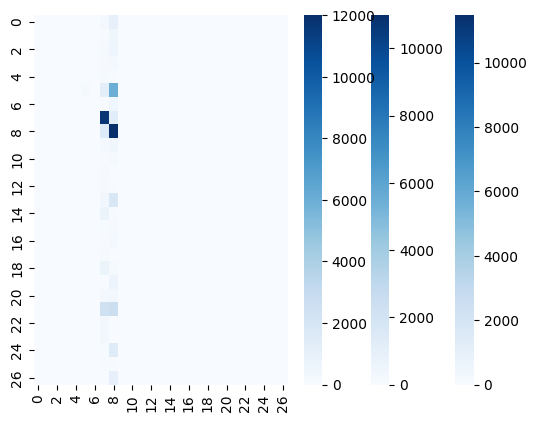

In [108]:
import seaborn as sns
sns.heatmap(cmLR,cmap='Blues')



<Axes: >

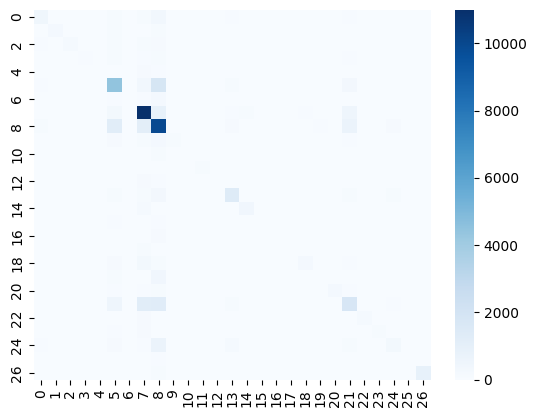

In [109]:
sns.heatmap(cmSVM,cmap='Blues')

<Axes: >

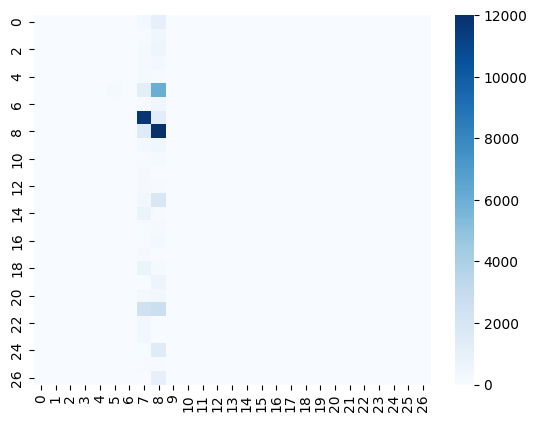

In [110]:
sns.heatmap(cmNB,cmap='Blues')

In [104]:
LReport=classification_report(y_true,predictionsLR)
SVMReport=classification_report(y_true,predictionsSVM)
NBeport=classification_report(y_true,predictionsNB)

/Users/mac/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [111]:
from sklearn.metrics import accuracy_score
LR_Acc=accuracy_score(y_true,predictionsLR)
SVM_Acc=accuracy_score(y_true,predictionsSVM)
NB_Acc=accuracy_score(y_true,predictionsNB)

In [112]:
print('logistic regression model accuracy is ',LR_Acc)
print('support vector machine model accuracy is ',SVM_Acc)
print('naive bayes model accuracy is ',NB_Acc)

logistic regression model accuracy is  0.5944464944649447
support vector machine model accuracy is  0.5945018450184502
naive bayes model accuracy is  0.4426752767527675
